In [41]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d, convolve2d
from skimage.transform import resize
%matplotlib inline

/home/vasily/.virtualenvs/cv/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


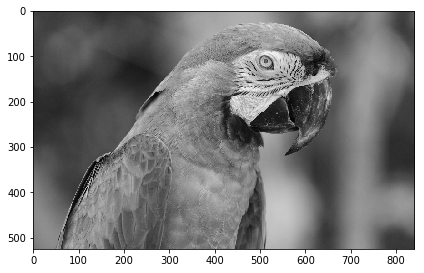

In [30]:
img = imread('parrot.png', as_grey =True)
koef = 2
img = resize(img, (img.shape[0] // koef, img.shape[1] // koef))
imshow(img)

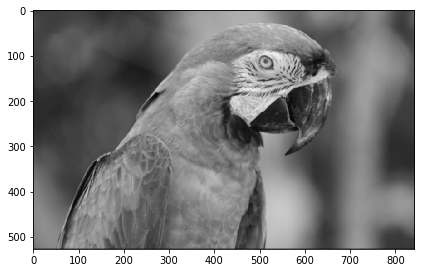

In [46]:
kernel = 1 / 9 * np.ones((3,3))
corr = correlate2d(img, kernel)
imshow(corr);

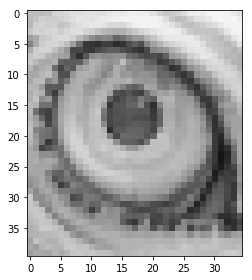

In [31]:
eye = img[190 // koef:270 // koef, 990 // koef:1060 // koef]
imshow(eye)

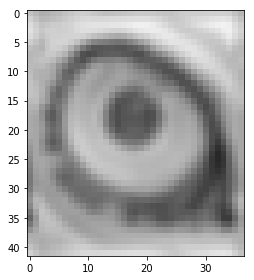

In [48]:
corr = correlate2d(eye, kernel, boundary = 'wrap')
imshow(corr);

In [51]:
kernel = 1 / 16 * np.array([[1, 2, 1], 
                            [2, 4, 2], 
                            [1, 2, 1]])
kernel

array([[ 0.0625,  0.125 ,  0.0625],
       [ 0.125 ,  0.25  ,  0.125 ],
       [ 0.0625,  0.125 ,  0.0625]])

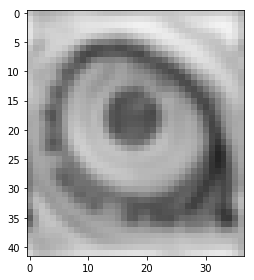

In [53]:
corr = correlate2d(eye, kernel, boundary = 'wrap')
imshow(corr);

In [54]:
kernel = np.array([[0, 0, 0], 
                   [1, 0, 0], 
                   [0, 0, 0]])
kernel

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0]])

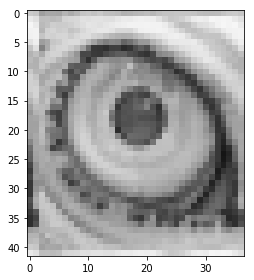

In [59]:
corr = correlate2d(eye, kernel, boundary = 'wrap')
imshow(corr);

/home/vasily/.virtualenvs/cv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


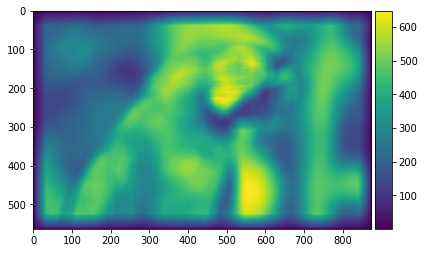

In [40]:
corr = correlate2d(img, eye)
imshow(corr);

In [38]:
np.where(corr == corr.max())

(array([464]), array([560]))

/home/vasily/.virtualenvs/cv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


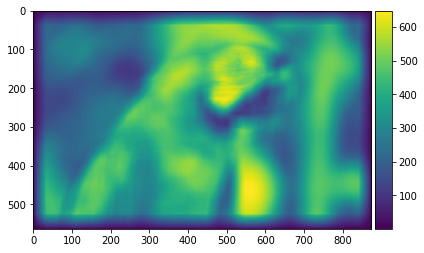

In [42]:
conv = convolve2d(img, eye)
imshow(conv);

In [45]:
np.array_equal(corr,conv)

False